# Uppgift 0

In [521]:
import pandas as pd
from data_processing import olymics_plot_df

df_athletes = pd.read_csv("./Data/athlete_events.csv")
df_regions = pd.read_csv("./Data/noc_regions.csv")

In [522]:
df_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [523]:
df_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [524]:
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [525]:
df_athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [526]:
df_athletes.columns, df_regions.columns

(Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
        'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
       dtype='object'),
 Index(['NOC', 'region', 'notes'], dtype='object'))

In [527]:
# a) number of countries
len(df_athletes['NOC'].unique()), len(df_regions["region"].unique())

(230, 207)

In [528]:
# some countries have multiple NOCs
df_regions[df_regions["region"].duplicated()].sort_values(by = "region")

,NOC,region,notes
12,AUS,Australia,NaN
147,NFL,Canada,Newfoundland
88,HKG,China,Hong Kong
54,CZE,Czech Republic,NaN
197,TCH,Czech Republic,NaN
173,SAA,Germany,NaN
79,GER,Germany,NaN
76,GDR,Germany,NaN
81,GRE,Greece,NaN
126,MAS,Malaysia,NaN


In [529]:
df_regions[df_regions["NOC"].duplicated()]

,NOC,region,notes


In [530]:
# some have different notes for countries with same region
df_regions[df_regions["region"] == "China"]

,NOC,region,notes
41,CHN,China,NaN
88,HKG,China,Hong Kong


In [531]:
# other do not specify what differing NOC implies in same region
df_regions[df_regions["region"] == "Germany"]

,NOC,region,notes
70,FRG,Germany,NaN
76,GDR,Germany,NaN
79,GER,Germany,NaN
173,SAA,Germany,NaN


In [532]:
df_regions[df_regions["region"] == "Yemen"]

,NOC,region,notes
224,YAR,Yemen,North Yemen
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen


In [533]:
# b)
df_regions.drop_duplicates(subset = "region", keep = "first")["NOC"].unique()

array(['AFG', 'AHO', 'ALB', 'ALG', 'AND', 'ANG', 'ANT', 'ANZ', 'ARG',
       'ARM', 'ARU', 'ASA', 'AUT', 'AZE', 'BAH', 'BAN', 'BAR', 'BDI',
       'BEL', 'BEN', 'BER', 'BHU', 'BIH', 'BIZ', 'BLR', 'BOH', 'BOL',
       'BOT', 'BRA', 'BRN', 'BRU', 'BUL', 'BUR', 'CAF', 'CAM', 'CAN',
       'CAY', 'CGO', 'CHA', 'CHI', 'CHN', 'CIV', 'CMR', 'COD', 'COK',
       'COL', 'COM', 'CPV', 'CRC', 'CRO', 'CRT', 'CUB', 'CYP', 'DEN',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'ERI', 'ESA', 'ESP', 'EST',
       'ETH', 'EUN', 'FIJ', 'FIN', 'FRA', 'FRG', 'FSM', 'GAB', 'GAM',
       'GBR', 'GBS', 'GEO', 'GEQ', 'GHA', 'GRN', 'GUA', 'GUI', 'GUM',
       'GUY', 'HAI', 'HON', 'HUN', 'INA', 'IND', 'IOA', 'IRI', 'IRL',
       'IRQ', 'ISL', 'ISR', 'ISV', 'ITA', 'IVB', 'JAM', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KGZ', 'KIR', 'KOR', 'KOS', 'KSA', 'KUW', 'LAO',
       'LAT', 'LBA', 'LBR', 'LCA', 'LES', 'LIB', 'LIE', 'LTU', 'LUX',
       'MAD', 'MAL', 'MAR', 'MAW', 'MDA', 'MDV', 'MEX', 'MGL', 'MHL',
       'MKD', 'MLI',

In [534]:
# c)
df_athletes["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [535]:
# d)
df_athletes["Medal"].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [536]:
# e)
df_athletes["Age"].describe(), df_athletes["Age"].median()

(count    261642.000000
 mean         25.556898
 std           6.393561
 min          10.000000
 25%          21.000000
 50%          24.000000
 75%          28.000000
 max          97.000000
 Name: Age, dtype: float64,
 24.0)

In [537]:
# g)
df_athletes["Sex"].head(), df_athletes["Sex"].dtype, df_athletes["Sex"].describe()

(0    M
 1    M
 2    M
 3    M
 4    F
 Name: Sex, dtype: object,
 dtype('O'),
 count     271116
 unique         2
 top            M
 freq      196594
 Name: Sex, dtype: object)

In [538]:
len(df_athletes), len(df_athletes["Name"].unique())

df_athletes.drop_duplicates(subset = "Name", keep = "first")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN


In [539]:
# duplicate names
len(df_athletes["ID"].unique()) -len(df_athletes["Name"].unique())

839

In [540]:
# same person has same ID
df_athletes[df_athletes["Name"].duplicated()].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [541]:
# check female proportion over the years
df_athletes.groupby("Year")["Sex"].value_counts()

Year  Sex
1896  M       380
1900  M      1903
      F        33
1904  M      1285
      F        16
             ... 
2012  F      5815
2014  M      2868
      F      2023
2016  M      7465
      F      6223
Name: Sex, Length: 69, dtype: int64

In [542]:
# new df with proportion per year
df_men = df_athletes[df_athletes["Sex"] == "M"].groupby("Year").count()['ID']
df_women = df_athletes[df_athletes["Sex"] == "F"].groupby("Year").count()['ID']

df_equality = df_women / (df_women + df_men)
df_equality = pd.DataFrame(df_equality)
df_equality.tail()

,ID
Year,
2008,0.427584
2010,0.419582
2012,0.450077
2014,0.413617
2016,0.454632


In [543]:
# get proportion of sexes who win medals over the years
df_unique = df_athletes.drop_duplicates(subset = "ID", keep ="first")
df_men = df_unique[df_unique["Sex"] == "M"]
df_women = df_unique[df_unique["Sex"] == "F"]

df_athletes[df_athletes["Medal"].isna() == False]["Sex"].value_counts().loc["M"]

28530

In [544]:
# number of participants per year
s_num_m = df_athletes[df_athletes["Sex"] == "M"].groupby("Year")["ID"].count()
s_num_f = df_athletes[df_athletes["Sex"] == "F"].groupby("Year")["ID"].count()

In [545]:
df_medals = df_athletes[df_athletes["Medal"].isna() == False]
s_num_medals_m = df_medals[df_medals["Sex"] == "M"].groupby("Year")["Medal"].count()
s_num_medals_f = df_medals[df_medals["Sex"] == "F"].groupby("Year")["Medal"].count()

df_medals_f = pd.DataFrame(s_num_medals_f / s_num_f).reset_index().rename({0: "medal_proportion"}, axis=1)
df_medals_m = pd.DataFrame(s_num_medals_m / s_num_m).reset_index().rename({0: "medal_proportion"}, axis=1)

In [546]:
pd.merge(df_medals_f, df_medals_m, on = "Year")

,Year,medal_proportion_x,medal_proportion_y
0,1900,0.393939,0.310562
1,1904,0.625000,0.370428
2,1906,0.545455,0.262485
3,1908,0.340426,0.266863
4,1912,0.344828,0.230458
5,1920,0.328358,0.303992
6,1924,0.199234,0.167526
7,1928,0.235698,0.140160
8,1932,0.184282,0.227304
9,1936,0.176685,0.135435


In [547]:
# get proportion of medals per country

# medals per country
s_noc_medals = df_medals.groupby("NOC")["Medal"].count()
# participants per country
s_noc_id = df_athletes.groupby("NOC")["ID"].count()

df_countries = (s_noc_medals / s_noc_id).reset_index().rename({0: "medals_per_participant"}, axis=1)
df_countries = df_countries.sort_values(by = "medals_per_participant", ascending=False)
df_countries.head()

,NOC,medals_per_participant
214,URS,0.440281
76,GDR,0.379962
7,ANZ,0.337209
66,EUN,0.322917
216,USA,0.298998


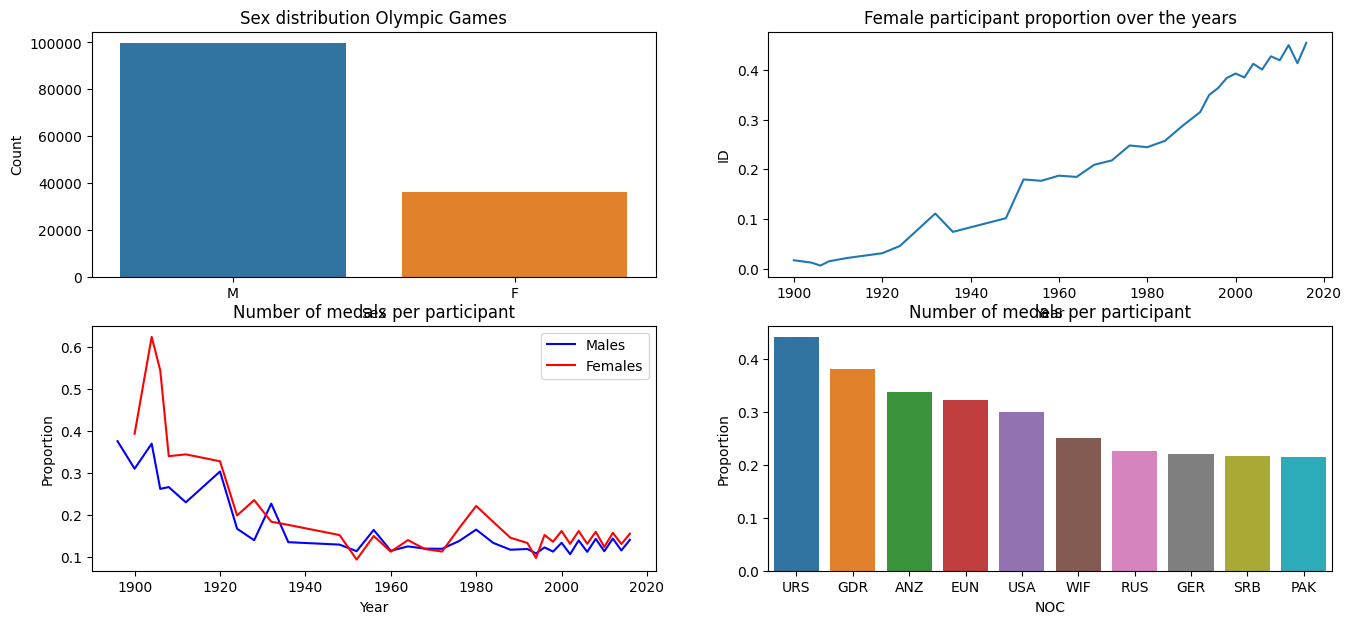

In [548]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2, figsize = (16,7))
# indexing makes sure same person only counted once
axes[0,0] = sns.countplot(data = df_athletes.loc[df_athletes["ID"].unique()], x = "Sex", ax=axes[0,0])
axes[0,0].set(title = "Sex distribution Olympic Games", xlabel = "Sex", ylabel = "Count")

axes[0,1] = sns.lineplot(data = df_equality, x = "Year", y = "ID", ax = axes[0,1])
axes[0,1].set(title = "Female participant proportion over the years")
axes[1,0] = sns.lineplot(data = df_medals_m, x = "Year", y = "medal_proportion", color="blue", ax = axes[1,0], label = "Males")
axes[1,0] = sns.lineplot(data = df_medals_f, x = "Year", y = "medal_proportion", color="red", ax = axes[1,0], label = "Females")
axes[1,0].set(title = "Number of medals per participant", xlabel = "Year", ylabel = "Proportion")
axes[1,1] = sns.barplot(data = df_countries.head(10), x = "NOC", y = "medals_per_participant", ax = axes[1,1])
axes[1,1].set(title = "Number of medals per participant", ylabel = "Proportion");

In [549]:
import plotly_express as px

fig = px.bar(df_countries, x = "NOC", y = "medals_per_participant")

fig.show()

In [550]:
# add year dimension to countries plot in scatterplot??????
df = pd.DataFrame(df_medals.groupby("Year")[["Medal", "NOC"]].value_counts())


# Uppgift 1

### China df

In [551]:
df_china = df_athletes[df_athletes["NOC"] == "CHN"]
print(df_china.duplicated().sum())
df_china.head()

0


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
1072,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN
2611,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN
2612,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN


### Medals per sport

In [552]:
df = df_china
df = olymics_plot_df(df, "Sport", "Medal")
df = df.sort_values("Medal", ascending = False)

fig = px.bar(df.head(10), x = "Sport", y = "Medal")
fig.show()

### Participants per OS

In [553]:
df = df_china
fig = olymics_plot_df(df, "Games", "ID", grouping = "Season", plot="bar")
fig.update_layout(title_text = "Chinese participants per OS")
fig.show()

Conclusions:
- They completely skipped the games between 1952 and 1980
- They tend send many more people to the summer olympics

### Medals per OS

In [554]:
df = df_china
fig = olymics_plot_df(df, "Games", "Medal", grouping = "Season", plot = "bar")
fig.update_layout(title_text = "Chinese medals per OS and season")
fig.show()

Conclusion: China seems to do better doing the summer games

### Medals per participant each OS by season

In [555]:
df = df_china
df_medals = olymics_plot_df(df, "Games", "Medal", grouping = "Season")
df_total = olymics_plot_df(df, "Games", "ID", grouping = "Season")

df_sum = pd.merge(df_medals.drop("Winter", axis=1), df_total.drop("Winter", axis=1), on = "Games", suffixes = ["_medals", "_total"])
df_sum["Summer"] = df_sum.iloc[:,1] / df_sum.iloc[:,2]

df_win = pd.merge(df_medals.drop("Summer", axis=1), df_total.drop("Summer", axis=1), on = "Games", suffixes = ["_medals", "_total"])
df_win["Winter"] = df_win.iloc[:,1] / df_win.iloc[:,2]

df = pd.merge(df_sum, df_win, on = "Games")

fig = px.bar(df, x = "Games", y = ["Summer", "Winter"], title = "Medals per participant", labels = {"variable": "Season", "value": "Proportion"})
fig.show()

Concslusion: China definitely performs better during the summer games

### Participants per OS - male and female

In [556]:
df = df_china
fig = olymics_plot_df(df, "Games", "ID", grouping = "Sex", plot="bar")
fig.update_layout(title_text = "Chinese participants per OS - male and female")
fig.show()

Conclusion: Unusually high female-to-male ratio

### Female-to-male ratio

In [557]:
df = df_china
df_medals = olymics_plot_df(df, "Games", "Medal", grouping = "Sex")
df_total = olymics_plot_df(df, "Games", "ID", grouping = "Sex")

df_ratio = pd.merge(df_medals, df_total, on = "Games", suffixes=["_medal", "_total"])
df_ratio["M_medal_per_id"] = df_ratio["M_medal"]/df_ratio["M_total"]
df_ratio["F_medal_per_id"] = df_ratio["F_medal"]/df_ratio["F_total"]
df_ratio["F_percentage_total"] = df_ratio["F_total"]/(df_ratio["F_total"] + df_ratio["M_total"])
df_ratio.columns

Index(['Games', 'M_medal', 'F_medal', 'M_total', 'F_total', 'M_medal_per_id',
       'F_medal_per_id', 'F_percentage_total'],
      dtype='object')

In [558]:
fig = px.bar(df_ratio, x = "Games", y = "F_percentage_total", title = "Female-to-male ratio", labels = {"F_percentage_total": "Ratio"})
fig.show()

Conclusion: Since the late 80s there have been more female participants than male (with a single exception in 2008 Summer)

### Medals per OS - male and female

In [559]:
df = df_china
fig = olymics_plot_df(df, "Games", "Medal", grouping = "Sex", plot="bar")
fig.update_layout(title_text = "Medals per OS - male and female")
fig.show()

Conclusion:
- It looks like females also perform much better
- Big spike in 2008 Summer (when there were more than normal males)

### Medals per participant - Male and female

In [560]:
# remove winter games for clarity
filter_ = df_ratio["Games"].str.contains("Winter")
df_ratio = df_ratio[~filter_]
fig = px.bar(df_ratio, x = "Games", y = ["M_medal_per_id", "F_medal_per_id"], barmode = "group", title = "Medals per participant - Male and female",
labels = {"variable": "Sex", "M_medal_per_id": "Male", "F_medal_per_id": "Female", "value": "Proportion"})
fig.show()

Conclusion: Females tend to perform a lot better than males

### Medals per OS by sport

- filter out the top sports
- switch to lineplot to see the development?

In [561]:
df = df_china[df_china["Season"] == "Summer"]
fig = olymics_plot_df(df, "Games", "Medal", grouping = "Sport", plot = "scatter")
fig.update_layout(title_text = "Chinese medals per OS by sport")
fig.show()

### Height distribution + Sport

In [562]:
df = df_china
fig = olymics_plot_df(df, "Height", "ID", grouping = "Sport", plot = "scatter")
fig.update_layout(title_text = "Height distribution")
fig.show()

### Weight distribution + Sports

In [563]:
df = df_china
fig = olymics_plot_df(df, "Weight", "ID", grouping = "Sport", plot = "scatter")
fig.update_layout(title_text = "Weight distribution")
fig.show()

# Uppgift 2

In [564]:
df_athletes["Sport"].unique()




array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al